# **College Placement Data Analysis**




In [ ]:
from google.colab import files
uploaded=files.upload()

Saving collegePlace.csv to collegePlace.csv


In [ ]:
import pandas as pd
df=pd.read_csv("collegePlace.csv")

**Displaying DataSet (including anomalies)**

In [ ]:
print(df.head(30))

     Age  Gender  ... HistoryOfBacklogs  PlacedOrNot
0   22.0    Male  ...                 1          1.0
1   21.0  Female  ...                 1          1.0
2   22.0  Female  ...                 0          1.0
3   21.0    Male  ...                 1          1.0
4    NaN    Male  ...                 0          1.0
5   22.0    Male  ...                 0          0.0
6   21.0    Male  ...                 1          0.0
7   21.0    Male  ...                 0          0.0
8   21.0    Male  ...                 0          1.0
9   21.0  Female  ...                 0          0.0
10  22.0    Male  ...                 0          0.0
11  22.0  Female  ...                 1          1.0
12  21.0  Female  ...                 1          0.0
13  21.0    Male  ...                 1          1.0
14  21.0  Female  ...                 0          1.0
15  22.0    Male  ...                 0          1.0
16  22.0  Female  ...                 0          0.0
17  21.0    Male  ...                 0       

We can see there are some NULL values (NaN values) present indicating the dataset needs cleaning 

**Describe Dataset**

In [ ]:
df.describe(include='O')

,Gender,Stream
count,2954,2948
unique,2,6
top,Male,Computer Science
freq,2467,772


**Dataset** **Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2960 non-null   float64
 1   Gender             2960 non-null   object 
 2   Stream             2960 non-null   object 
 3   Internships        2966 non-null   int64  
 4   CGPA               2961 non-null   float64
 5   Hostel             2966 non-null   int64  
 6   HistoryOfBacklogs  2966 non-null   int64  
 7   PlacedOrNot        2959 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 185.5+ KB


The dataset has different data types and some null values 

**Displaying Null Values In DataSet**

In [ ]:
print(df[df.isnull().any(axis=1)])

       Age  Gender  ... HistoryOfBacklogs  PlacedOrNot
4      NaN    Male  ...                 0          1.0
27    22.0    Male  ...                 0          1.0
28     NaN    Male  ...                 0          1.0
82     NaN    Male  ...                 0          1.0
149   24.0    Male  ...                 0          1.0
167    NaN  Female  ...                 0          0.0
249   22.0    Male  ...                 0          NaN
279   21.0     NaN  ...                 1          1.0
334   22.0    Male  ...                 1          NaN
341   22.0    Male  ...                 0          1.0
398   21.0  Female  ...                 0          1.0
428    NaN  Female  ...                 0          1.0
437   21.0  Female  ...                 0          NaN
487   22.0    Male  ...                 0          0.0
508   21.0    Male  ...                 0          NaN
525   22.0    Male  ...                 1          0.0
526   22.0     NaN  ...                 0          0.0
533   22.0

The above code shows that 30 rows in the Dataset have Null values somewhere in the 8 different columns

**Replacing NULL Values in "Age" Column with Mean of Age**

In [ ]:
mAge=df['Age'].mean()
df['Age'].fillna(mAge,inplace=True)
print(df[df.isnull().any(axis=1)])

       Age  Gender  ... HistoryOfBacklogs  PlacedOrNot
27    22.0    Male  ...                 0          1.0
149   24.0    Male  ...                 0          1.0
249   22.0    Male  ...                 0          NaN
279   21.0     NaN  ...                 1          1.0
334   22.0    Male  ...                 1          NaN
341   22.0    Male  ...                 0          1.0
398   21.0  Female  ...                 0          1.0
437   21.0  Female  ...                 0          NaN
487   22.0    Male  ...                 0          0.0
508   21.0    Male  ...                 0          NaN
525   22.0    Male  ...                 1          0.0
526   22.0     NaN  ...                 0          0.0
533   22.0     NaN  ...                 0          0.0
603   21.0    Male  ...                 0          1.0
652   22.0     NaN  ...                 0          1.0
757   24.0    Male  ...                 0          1.0
797   22.0     NaN  ...                 0          1.0
882   22.0

The missing age values have been replaced with the mean leaving 24 Null Values in the dataset

**Rows with NULL CGPA and PlacedOrNot Values are dropped from Dataset**

In [ ]:
df.dropna(subset=['CGPA' ,'PlacedOrNot'],inplace=True)
print(df[df.isnull().any(axis=1)])


       Age Gender  ... HistoryOfBacklogs  PlacedOrNot
279   21.0    NaN  ...                 1          1.0
487   22.0   Male  ...                 0          0.0
526   22.0    NaN  ...                 0          0.0
533   22.0    NaN  ...                 0          0.0
603   21.0   Male  ...                 0          1.0
652   22.0    NaN  ...                 0          1.0
757   24.0   Male  ...                 0          1.0
797   22.0    NaN  ...                 0          1.0
882   22.0   Male  ...                 1          1.0
971   21.0   Male  ...                 0          1.0
1102  21.0   Male  ...                 1          1.0
1124  22.0    NaN  ...                 0          1.0

[12 rows x 8 columns]


Rows having Null CGPA and PlacedOrNot Values are dropped. We can now see that there are 6 rows which have Missing Values in the "Gender" and "Stream" columns that need to be replaced as the final steps in the data-cleaning process. 

**Replace missing "Gender" column values with "Male"**

In [ ]:
df['Gender'].fillna("Male",inplace=True)
print(df[df.isnull().any(axis=1)])

       Age  Gender  ... HistoryOfBacklogs  PlacedOrNot
4      NaN    Male  ...                 0          1.0
27    22.0    Male  ...                 0          1.0
28     NaN    Male  ...                 0          1.0
82     NaN    Male  ...                 0          1.0
149   24.0    Male  ...                 0          1.0
167    NaN  Female  ...                 0          0.0
249   22.0    Male  ...                 0          NaN
334   22.0    Male  ...                 1          NaN
341   22.0    Male  ...                 0          1.0
398   21.0  Female  ...                 0          1.0
428    NaN  Female  ...                 0          1.0
437   21.0  Female  ...                 0          NaN
487   22.0    Male  ...                 0          0.0
508   21.0    Male  ...                 0          NaN
525   22.0    Male  ...                 1          0.0
603   21.0    Male  ...                 0          1.0
757   24.0    Male  ...                 0          1.0
882   22.0

All missing gender values replaced. Null values now left only in the "Stream" Column

## Features wrt to Internship.

Internship Vs CGPA for different genders


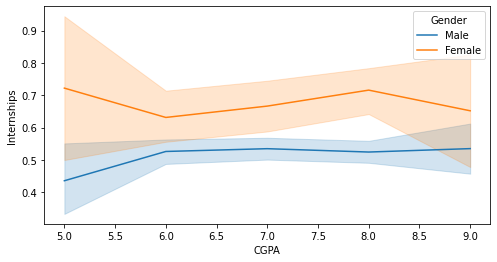

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
colg = df.copy()
colg['Internships'] = colg['Internships'].apply(lambda x: 1 if x>0 else x)
plt.figure(figsize=(8,4))
sns.lineplot(x='CGPA',y='Internships',data=colg,hue='Gender')
plt.show()

Analysis: Females do have a slight edge over Male in securing an internship irrespective of the CGPA In Male candidate more the CGPA higher are the chances of getting an internship, While this trend is not with females where and chances increase initially and then slopes down.

Plots with respect to counts


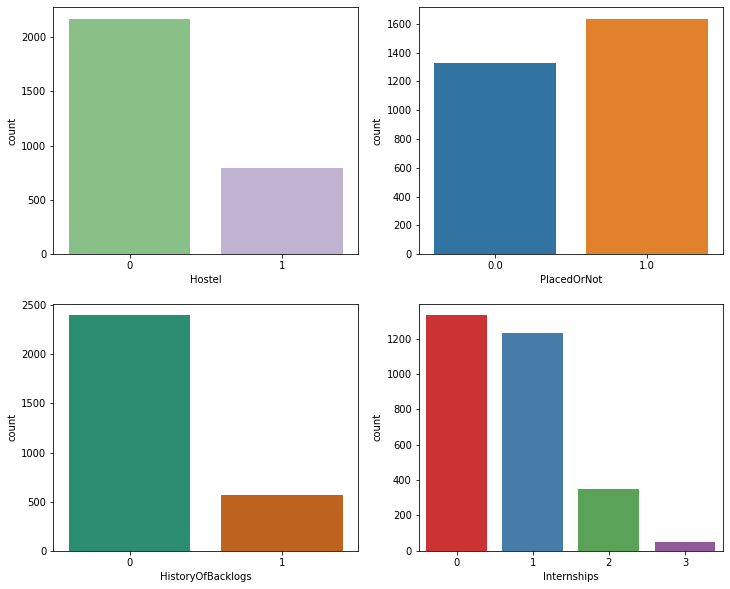

In [ ]:
plt.subplots(2,2,figsize=(12,10))
plt.subplot(221)
sns.countplot(data=df, x='Hostel',palette='Accent')
plt.subplot(222)
sns.countplot(data=df, x='PlacedOrNot')
plt.subplot(223)
sns.countplot(data=df, x='HistoryOfBacklogs',palette='Dark2')
plt.subplot(224)
sns.countplot(data=df, x='Internships',palette='Set1')
plt.show()

Analysis: Nearly 50% of students haven't done any internship while among the rest majority of them have done atleast 1 internship and some have even done 3.
About 25% of the total students were residing in hostel.

Internship Vs PlacedOrNot




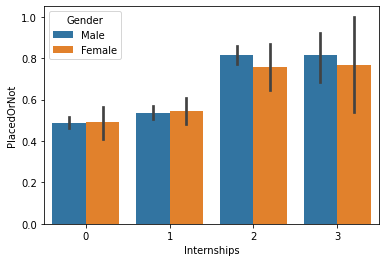

In [ ]:
sns.barplot(data=df,x='Internships',y='PlacedOrNot',hue='Gender')
plt.show()

Analysis:If you have done more than 1 internship the chances of getting placed are actually good.

## Features with respect to Gender.

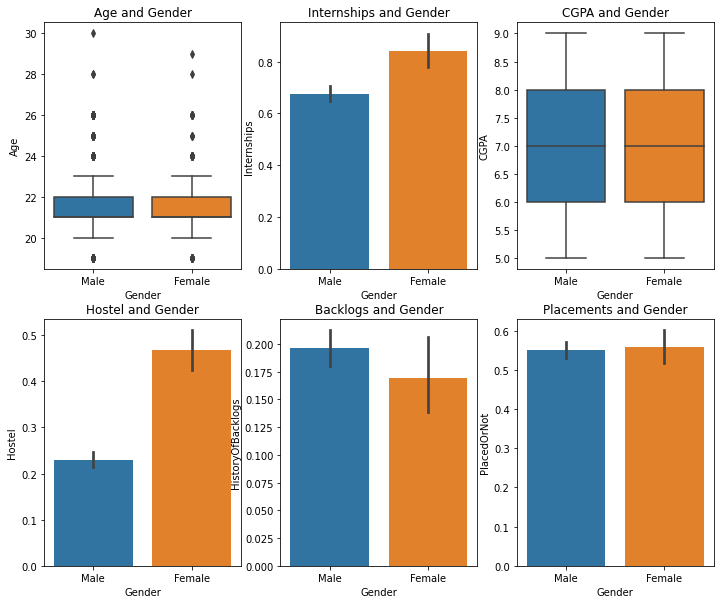

In [ ]:
plt.subplots(2,3,figsize=(12,10))
plt.subplot(231)
plt.title('Age and Gender')
sns.boxplot(y='Age',x='Gender',data=df)
plt.subplot(232)
plt.title('Internships and Gender')
sns.barplot(x='Gender',y='Internships',data=df)
plt.subplot(233)
plt.title('CGPA and Gender')
sns.boxplot(x='Gender',y='CGPA',data=df)
plt.subplot(234)
plt.title('Hostel and Gender')
sns.barplot(x='Gender',y='Hostel',data=df)
plt.subplot(235)
plt.title('Backlogs and Gender')
sns.barplot(x='Gender',y='HistoryOfBacklogs',data=df)
plt.subplot(236)
plt.title('Placements and Gender')
sns.barplot(x='Gender',y='PlacedOrNot',data=df)
plt.show()

Analysis:The median value of Internships by Female is quite higher than that of the Male one's.
Male as well as the Female candidates have same median value of 7CGPA.
Female have more tendency to stay in hostel than the Males.
On an average Male candidate has more backlogs then the Female ones.
With respect to Placements, the chances of Female candidate being placed is just a fraction more than that of the Male candidates.

## Features with respect to CGPA.

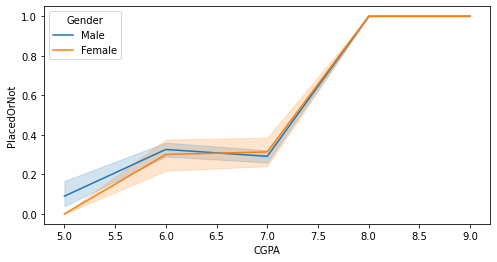

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x='CGPA',y='PlacedOrNot',data=df,hue='Gender')
plt.show()

Analysis:If one scores more than 8 CGPA the chances of getting placed are actually extremely good than the rest, irrespective of the Gender.